# 一、概述

## 1.matplotlib的三层api

matplotlib的原理或者说基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。

matplotlib有三个层次的API：
matplotlib.backend_bases.FigureCanvas 代表了绘图区，所有的图像都是在绘图区完成的
matplotlib.backend_bases.Renderer 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。
matplotlib.artist.Artist 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。

前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，95%的时间，都是用来和matplotlib.artist.Artist类打交道的。

## 2.Artist的分类

Artist有两种类型：primitives 和containers。

primitive是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文字text，矩形Rectangle，图像image等。

container是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。他们之间的关系如下图所示：
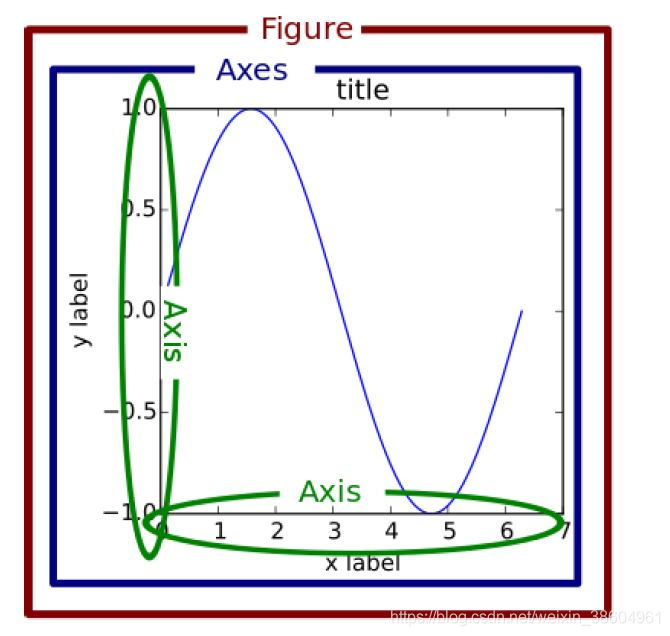

## 3.matplotlib标准用法
matplotlib的标准使用流程为：
1.创建一个Figure实列
2.使用Figure实例创建一个或多个Axes或Subplot实例
3.使用Axes实例的辅助方法创建primitive

一个示例如下：

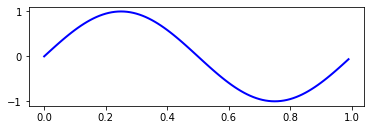

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

ax = fig.add_subplot(2, 1, 1)

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line = ax.plot(t, s, color = "blue", lw = 2)

# 二、基本元素-primitives

## 1.2DLines

常用的参数：

xdata:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)

ydata:需要绘制的line中点的在y轴上的取值

linewidth:线条的宽度

linestyle:线型

color:线条的颜色

marker:点的标记，详细可参考markers API

markersize:标记的size


有三种方法可以设置线的属性：

1.直接在plot()函数中设置

2.通过获得线对象，对线对象进行设置

3.获得线属性，使用setp()函数设置


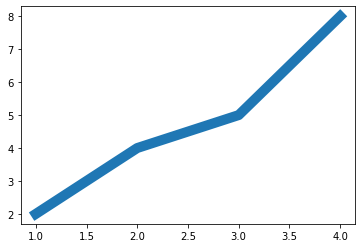

In [2]:
# 直接在plot（）函数中设置
import matplotlib.pyplot as plt

x = range(1, 5)
y = [2, 4, 5, 8]
plt.plot(x, y, linewidth=10)

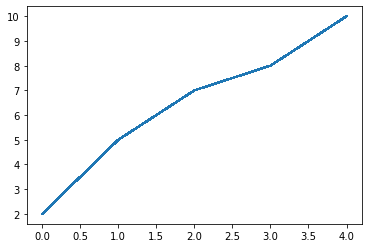

In [3]:
# 通过获得线对象，对线对象进行设置
import matplotlib.pyplot as plt

x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿功能

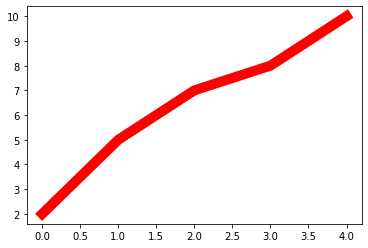

In [4]:
# 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10);

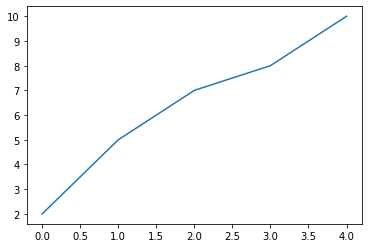

In [5]:
# 绘制lines，pyplot方法绘制
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y)

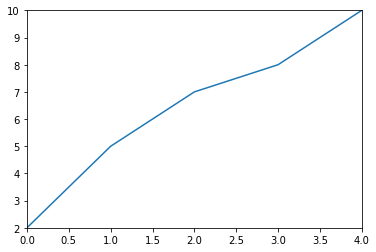

In [6]:
# 绘制lines，Line2D对象绘制

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure()

x = range(0,5)
y = [2,5,7,8,10]

ax = fig.add_subplot(1,1,1)

line = Line2D(x, y)

ax.add_line(line)

ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

plt.show()

<ErrorbarContainer object of 3 artists>

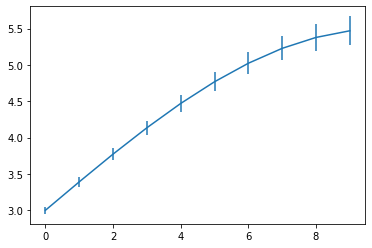

In [7]:
# errorbar绘制误差折线图

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = np.arange(10)
y = 2.5*np.sin(x / 20*np.pi)

yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y+3, yerr = yerr)

## 2.patches

matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist，它的构造函数：
详细清单见 matplotlib.patches API

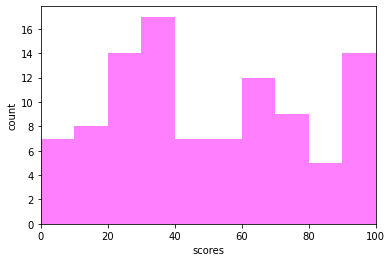

In [1]:
# hist绘制直方图

import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(0, 100, 100) #随机生成[0,100)之间的100个数据
bins = np.arange(0, 101, 10) #设置连续的边界值，0、10、20...、90、100

plt.hist(x, bins, color = 'fuchsia', alpha = 0.5)
plt.xlabel('scores')
plt.ylabel('count')

plt.xlim(0, 100) #设置x轴分布范围
plt.show()

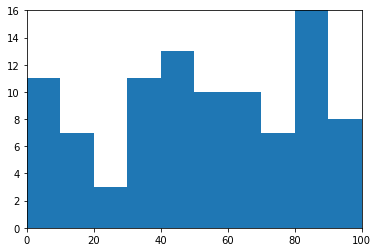

In [2]:
# Rectangle矩形类绘制直方图

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

df = pd.DataFrame(columns = ['data'])

x=np.random.randint(0,100,100)
bins=np.arange(0,101,10)

df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins = bins, right = False, include_lowest = True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0), df_cnt.loc[i,'width'], df_cnt.loc[i,'fenzu'])
    ax1.add_patch(rect)
    
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)

plt.show()  

bar-柱状图

matplotlib.pyplot.bar(left, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)

left：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串

height：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；

alpha：透明度，值越小越透明

width：为柱形图的宽度，一般这是为0.8即可；

color或facecolor：柱形图填充的颜色；

edgecolor：图形边缘颜色

label：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

<BarContainer object of 16 artists>

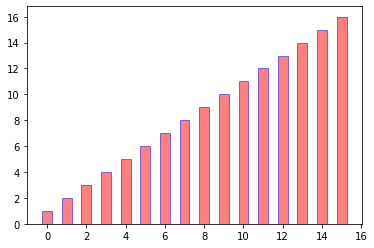

In [3]:
# bar绘制柱状图

import matplotlib.pyplot as plt
import numpy as np

y = range(1,17)

plt.bar(np.arange(16), y, alpha = 0.5, width = 0.5, color = 'red', edgecolor = 'blue')

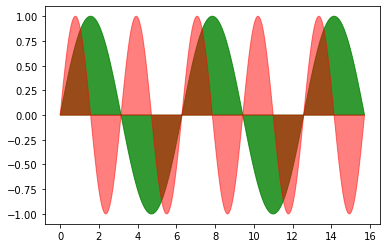

In [4]:
# Polygon-多边形，用fill来绘制图形

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5*np.pi, 1000)

y1 = np.sin(x)
y2 = np.sin(2*x)

plt.fill(x, y1, color = 'green', alpha = 0.8)
plt.fill(x, y2, color = 'red', alpha = 0.5)

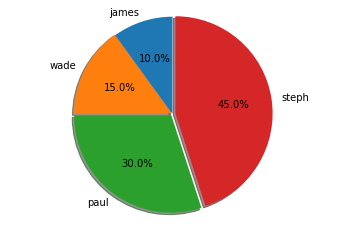

In [7]:
# pie绘制饼状图

import matplotlib.pyplot as plt


labels = ["james", "wade", "paul", "steph"]

sizes = [10, 15, 30, 45]

explode = (0, 0.01, 0.02, 0.03)

plt.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow=True, startangle=90)

plt.axis('equal');


## 3.collections

collections类是用来绘制一组对象的集合，collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。

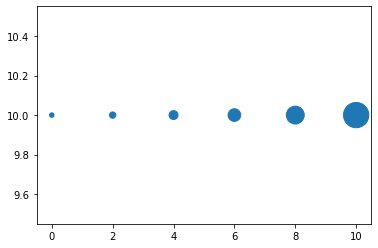

In [8]:
# 用scatter绘制散点图

import matplotlib.pyplot as plt


x = [0, 2, 4, 6, 8, 10]
y = [10]*len(x)

s = [20*2**n for n in range(len(x))]

plt.scatter(x, y, s=s)
plt.show()

## 4.images

images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像。

使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法，具体效果如下。

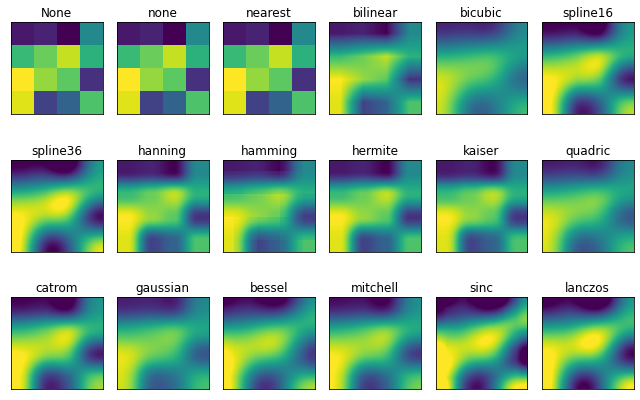

In [9]:
import matplotlib.pyplot as plt
import numpy as np


methods = ['None', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

grid = np.random.rand(4,4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6), subplot_kw={'xticks':[], 'yticks':[]})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))
    
plt.tight_layout()
plt.show()

# 三、对象容器 - Object container

## 1.Figure容器

Figure容器的常见属性：
Figure.patch属性：Figure的背景矩形
Figure.axes属性：一个Axes实例的列表（包括Subplot)
Figure.images属性：一个FigureImages patch列表
Figure.lines属性：一个Line2D实例的列表（很少使用）
Figure.legends属性：一个Figure Legend实例列表（不同于Axes.legends)
Figure.texts属性：一个Figure Text实例列表

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <matplotlib.axes._axes.Axes object at 0x0000027BAAFDF8B0>]


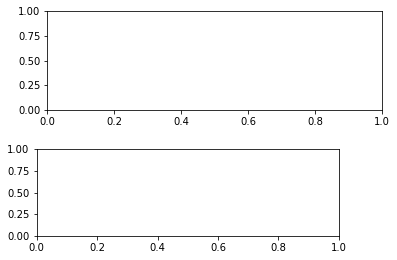

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1) #作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) 
#位置参数，四个数分别代表了(left,bottom,width,height)

print(ax1)
print(fig.axes)

## 2.Axes容器

matplotlib.axes.Axes是matplotlib的核心。大量的用于绘图的Artist存放在它内部，并且它有许多辅助方法来创建和添加Artist给它自己，而且它也有许多赋值方法来访问和修改这些Artist。

Axes有许多方法用于绘图，如.plot()、.text()、.hist()、.imshow()等方法

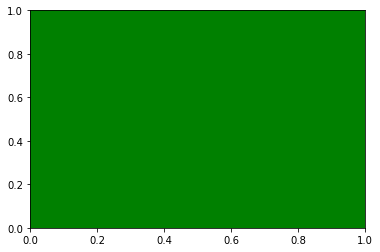

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

## 3.Axis容器

matplotlib.axis.Axis实例处理tick line、grid line、tick label以及axis label的绘制，它包括坐标轴上的刻度线、刻度label、坐标网格、坐标轴标题。通常你可以独立的配置y轴的左边刻度以及右边的刻度，也可以独立地配置x轴的上边刻度以及下边的刻度。

刻度包括主刻度和次刻度，它们都是Tick刻度对象。

Axis也存储了用于自适应，平移以及缩放的data_interval和view_interval。它还有Locator实例和Formatter实例用于控制刻度线的位置以及刻度label。

每个Axis都有一个label属性，也有主刻度列表和次刻度列表。这些ticks是axis.XTick和axis.YTick实例，它们包含着line primitive以及text primitive用来渲染刻度线以及刻度文本。

刻度是动态创建的，只有在需要创建的时候才创建（比如缩放的时候）。Axis也提供了一些辅助方法来获取刻度文本、刻度线位置等等：
常见的如下：

array([-0.2,  4.2])

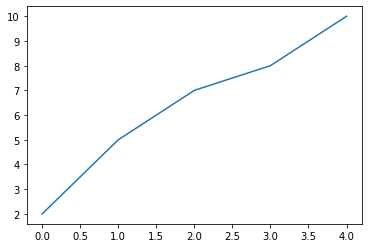

In [12]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔

下面的例子展示了如何调整一些轴和刻度的属性

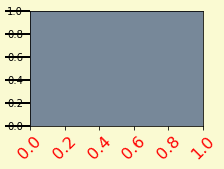

In [13]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_color('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

plt.show()

## 4.Tick容器

matplotlib.axis.Tick是从Figure到Axes到Axis到Tick中最末端的容器对象。
Tick包含了tick、grid line实例以及对应的label。

所有的这些都可以通过Tick的属性获取，常见的tick属性有
Tick.tick1line：Line2D实例
Tick.tick2line：Line2D实例
Tick.gridline：Line2D实例
Tick.label1：Text实例
Tick.label2：Text实例

y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。
x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。

下面的例子展示了，如何将Y轴右边轴设为主轴，并将标签设置为美元符号且为绿色：

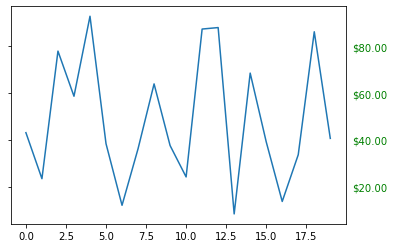

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True);